# Πανεπιστήμιο Θεσσαλίας

## Τμήμα Πληροφορικής με Εφαρμογές στη Βιοϊατρική

### Μάθημα:  Υπολογιστική Όραση
### Διδάσκων:  Κ. Δελήμπασης

### Τίτλος εργασίας: Χωρική Ταύτιση Εικόνων

Εκπονήθηκε από τον:  
**Καπετάνιο Δημήτριο --  (Α.Μ. 01544)**

-> (σε συνεργασία με την Βασιλεία Γεωργάκη, 01726)

### Στόχος:

Η εξοικείωση με τρισδιάστατα δεδομένα σε _raw_ μορφή και η εφαρμογή σε αυτά απλών τεχνικών χωρικής ταύτισης σε δύο διαστάσεις.

Ειδικότερα, δοθέντος δύο αρχείων απεικόνισης _computerized tomography(CT)_ θώρακα του ίδιου ασθενή σε διαφορετικές λήψεις ζητείται να:

1. Να διαβαστούν τα αρχεία _.raw_, αξιοποιώντας την πληροφορία που περιέχουν τα δύο αρχεία _.mha_

2. Να επιλεχθούν οι τομές: _286 του CT1_ και _372 του CT2_.

3. Να γίνει η προβολή των ακμών της _372(CT2)_ επί της διατομής _286(CT1)_.

4. Να επιλεχθούν ομόλογα σημεία στις δύο τομές αντίστοιχα, σε περιοχές που δεν υφίσταται οποιαδήποτε ελαστική παραμόρφωση.

5. Να υπολογιστεί ο πίνακας του affine γεωμετρικού μετασχηματισμού που απαιτείται για να ταυτίσει (κατά το δυνατόν περισσότερο) τα επιλεχθέντα ομόλογα σημεία.

6. Να εφαρμοστεί ο γραμμικός μετασχηματισμός _affine_ επάνω στην εικόνα του CT2.

7. Αντικαθιστώντας το βήμα _4_, να πραγματοποιηθεί η επιλογή των σημείων με χρήση χαρακτηριστικών της εικόνας _(image features)_ κι όχι με χειροκίνητο τρόπο από το χρήστη.

### Βιβλιοθήκες & Πακέτα

In [1]:
import pathlib                  # pathlib works on whatever os
import SimpleITK as sitk 
from medpy.io import load
import matplotlib.pyplot as plt
import numpy as np
import cv2 

# 1

### Ανάγνωση αρχείων

In [2]:
#task 1 --> read raw files using information from mhd files

#  .mha  Ξ  .mhd   (files)

In [3]:
mha1_directory = pathlib.Path('C:/Users/kapet/Desktop/cv/project1')

mha1_file = str(mha1_directory.joinpath('01_Fixed.mhd'))

In [4]:
mha2_directory = pathlib.Path('C:/Users/kapet/Desktop/cv/project1')

mha2_file = str(mha2_directory.joinpath('01_Moving.mhd'))

Μέθοδος για την ανάκτηση της πληροφορίας που περιέχουν τα αρχεία _.mha_

In [5]:
def read_files(mha_file):                 # Set up the reader and get the file information.
    
    file_reader = sitk.ImageFileReader()
    file_reader.SetFileName(mha_file)     # Give it the mha file as a string.
    file_reader.LoadPrivateTagsOn()       # Make sure it can get all the info.
    file_reader.ReadImageInformation()    # Get just the information from the file.
    
    return (file_reader)                  # returns the info for each image.

### CT - 1 :

In [6]:
print('1: \n', read_files(mha1_file)) #prints the info for the file 01_Fixed.mhd

1: 
 itk::simple::ImageFileReader
  FileName: "C:\Users\kapet\Desktop\cv\project1\01_Fixed.mhd"
  ExtractSize: [ ]
  ExtractIndex: [ ]
  Image Information:
    PixelType: 16-bit signed integer
    Dimension: 3
    NumberOfComponents: 1
    Direction: [ 1, 0, 0, 0, 1, 0, 0, 0, 1 ]
    Origin: [ 0, 0, 0 ]
    Spacing: [ 0.683594, 0.683594, 0.7 ]
    Size: [ 418, 368, 323 ]
  OutputPixelType: Unknown pixel id
  LoadPrivateTags: 1
  ImageIOName: 
  Registered ImageIO:
	BMPImageIO ( *.bmp, *.BMP, )
	BioRadImageIO ( *.PIC, *.pic, )
	Bruker2dseqImageIO
	GDCMImageIO ( *.dcm, *.DCM, *.dicom, *.DICOM, )
	GE4ImageIO
	GE5ImageIO
	GiplImageIO
	HDF5ImageIO ( *.hdf, *.h4, *.hdf4, *.h5, *.hdf5, *.he4, *.he5, *.hd5, )
	JPEGImageIO ( *.jpg, *.JPG, *.jpeg, *.JPEG, )
	JPEG2000ImageIO ( *.j2k, *.jp2, *.jpt, )
	LSMImageIO ( *.lsm, *.LSM, )
	MINCImageIO ( *.mnc, *.MNC, *.mnc2, *.MNC2, )
	MRCImageIO ( *.mrc, *.rec, )
	MetaImageIO ( *.mha, *.mhd, )
	NiftiImageIO ( *.nia, *.nii, *.nii.gz, *.hdr, *.img

### CT - 2 :

In [7]:
print('2: \n', read_files(mha2_file)) #prints the info for the file 01_Moving.mhd

2: 
 itk::simple::ImageFileReader
  FileName: "C:\Users\kapet\Desktop\cv\project1\01_Moving.mhd"
  ExtractSize: [ ]
  ExtractIndex: [ ]
  Image Information:
    PixelType: 16-bit signed integer
    Dimension: 3
    NumberOfComponents: 1
    Direction: [ 1, 0, 0, 0, 1, 0, 0, 0, 1 ]
    Origin: [ 0, 0, 0 ]
    Spacing: [ 0.679688, 0.679688, 0.7 ]
    Size: [ 462, 386, 412 ]
  OutputPixelType: Unknown pixel id
  LoadPrivateTags: 1
  ImageIOName: 
  Registered ImageIO:
	BMPImageIO ( *.bmp, *.BMP, )
	BioRadImageIO ( *.PIC, *.pic, )
	Bruker2dseqImageIO
	GDCMImageIO ( *.dcm, *.DCM, *.dicom, *.DICOM, )
	GE4ImageIO
	GE5ImageIO
	GiplImageIO
	HDF5ImageIO ( *.hdf, *.h4, *.hdf4, *.h5, *.hdf5, *.he4, *.he5, *.hd5, )
	JPEGImageIO ( *.jpg, *.JPG, *.jpeg, *.JPEG, )
	JPEG2000ImageIO ( *.j2k, *.jp2, *.jpt, )
	LSMImageIO ( *.lsm, *.LSM, )
	MINCImageIO ( *.mnc, *.MNC, *.mnc2, *.MNC2, )
	MRCImageIO ( *.mrc, *.rec, )
	MetaImageIO ( *.mha, *.mhd, )
	NiftiImageIO ( *.nia, *.nii, *.nii.gz, *.hdr, *.im

# 2

In [8]:
#task 2 --> plotting our images 

Προαιρετικά, για να τυπωθούν εντός του _jupyter notebook_.

In [9]:
%matplotlib inline

Για την πρώτη εικόνα :

There are 323 inter-sections in the CT-1


Text(0.5, 1.0, 'No. 286 intersection of CT-1')

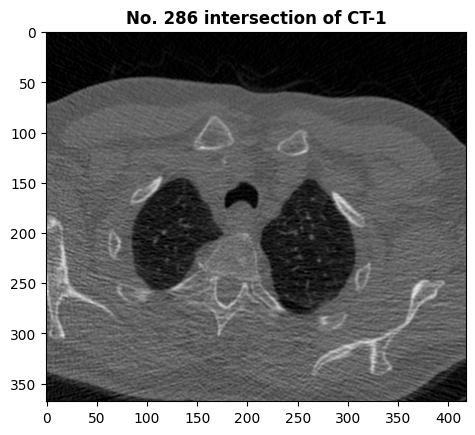

In [10]:
img1 = plt.figure("CT-1, Intersection 286")
itk_img1 = sitk.ReadImage(mha1_file) 
img1_array = sitk.GetArrayFromImage(itk_img1)
print(f"There are {len(img1_array)} inter-sections in the CT-1")
image1 = plt.imshow(img1_array[286], cmap=plt.cm.gray)
plt.title('No. 286 intersection of CT-1', fontweight ="bold")

Για τη δεύτερη εικόνα :

There are 412 inter-sections in the CT-2


Text(0.5, 1.0, 'No. 372 intersection of CT-2')

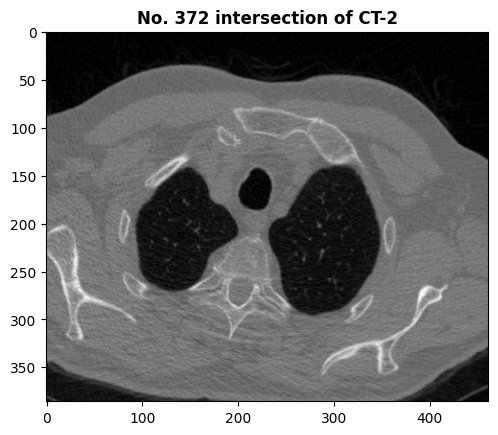

In [11]:
img2 = plt.figure("CT-2, Intersection 372")
itk_img2 = sitk.ReadImage(mha2_file) 
img2_array = sitk.GetArrayFromImage(itk_img2)
print(f"There are {len(img2_array)} inter-sections in the CT-2")
image2 = plt.imshow(img2_array[372], cmap=plt.cm.gray)
plt.title('No. 372 intersection of CT-2', fontweight ="bold")

# 3

In [ ]:
#task 3 --> project the edges of 372 onto 286

#### Θόλωση

Υπολογισμός της _γκαουσιανής_ για τη διατομή _372 του CT 2_.

Εφαρμόζεται μήτρα έντεκα επί έντεκα.

In [12]:
img2_gaussian = cv2.GaussianBlur(img2_array[372], (11,11), cv2.BORDER_DEFAULT)  #use Gaussian to blur CT2


Text(0.5, 1.0, 'Gaussian  (No. 372 intersection of CT-2)')

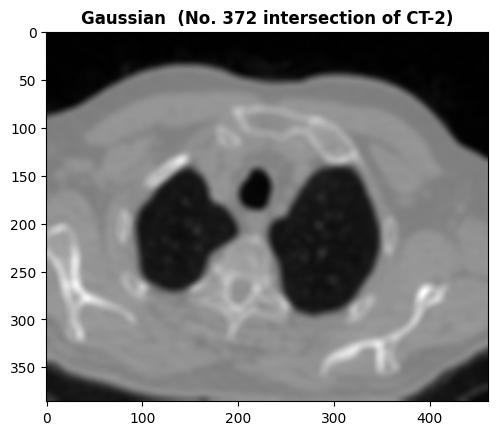

In [13]:
plt.imshow(img2_gaussian, cmap=plt.cm.gray)

plt.title("Gaussian  (No. 372 intersection of CT-2)", fontweight ="bold")

Υπολογισμός της _λαπλασιανής_ της _γκαουσιανής_.

In [14]:
LoG = cv2.Laplacian(img2_gaussian, cv2.CV_64F, cv2.COLOR_RGB2GRAY) # use the Laplacian of Gaussian to find the edges of CT2.


Text(0.5, 1.0, 'Laplacian of Gaussian (No. 372 intersection of CT-2)')

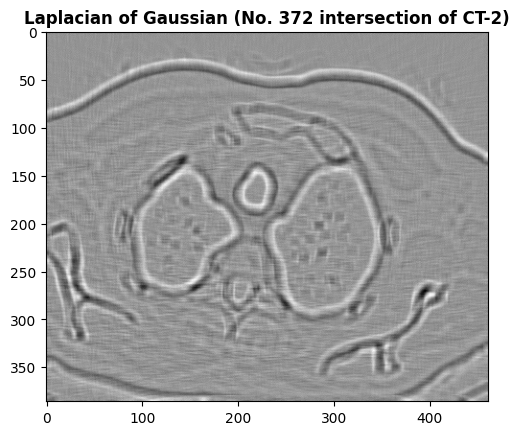

In [15]:
plt.imshow(LoG, cmap=plt.cm.gray)

plt.title("Laplacian of Gaussian (No. 372 intersection of CT-2)", fontweight ="bold")

In [16]:
#img2_laplacian_of_gaussian = plt.imshow(LoG, cmap=plt.cm.gray, clim=np.percentile(LoG, (1,99)))

Γενικότερα, η βιβλιοθήκη _open computer vision_ **[OpenCV]** θεωρεί πως κάθε ανοιχτό/λευκό πίξελ ανήκει στο προσκήνιο μίας εικόνας, ενώ κάθε σκούρο/μαύρο πίξελ εντάσσεται στο υπόβαθρο αυτής.

#### Κατωφλίωση

Ακολουθεί η  δυαδική κατωφλίωση της παραπάνω εικόνας.

Θα επιλεχθεί κατώφλι ίσον με δέκα για το βέλτιστο αποτέλεσμα. 

Δηλαδή εάν η τιμή κάποιου πίξελ είναι μεγαλύτερη του δέκα τότε χρωματίζεται μαύρο.
Αλλιώς αν είναι μικρότερη ή ίση του επτά χρωματίζεται άσπρο. 

In [23]:
ret, threshold_img = cv2.threshold(LoG, 7, 255, cv2.THRESH_BINARY)  # applying cv2.THRESH_BINARY thresholding techniques

threshold_img = threshold_img.astype(np.uint8)

Text(0.5, 1.0, 'Edges')

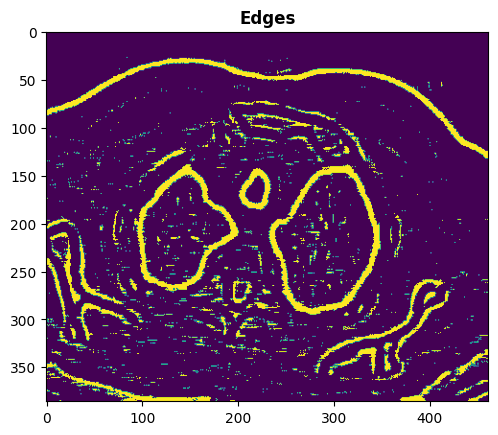

In [24]:
plt.imshow(threshold_img)
plt.title('Edges', fontweight ="bold")

Σε ασπρόμαυρη μορφή.

Text(0.5, 1.0, 'Edges')

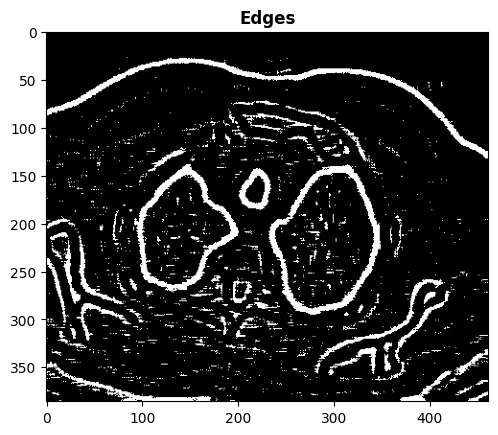

In [25]:
plt.imshow(threshold_img, cmap=plt.cm.gray)
plt.title('Edges', fontweight ="bold")

In [26]:
# find the contours from the thresholded image.

contours, hierarchy = cv2.findContours(threshold_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) 

#### Ομοίωμα για την 1η

In [27]:
clone_img1 = img1_array[286].copy()

In [28]:
#plt.imshow(clone_img1, cmap=plt.cm.gray)

In [29]:
print(len(img1_array[286]))

368


In [30]:
plt.imsave("C:/Users/kapet/Desktop/cv/project1/Clone1.png", clone_img1, cmap='gray')

clone_Img1 = cv2.imread("C:/Users/kapet/Desktop/cv/project1/Clone1.png")

In [ ]:
#plt.imshow(clone_Ιmg1)

#### Ομοίωμα για την 2η

In [31]:
clone_img2 = img2_array[372].copy()

In [32]:
#plt.imshow(clone_img2, cmap=plt.cm.gray)

In [33]:
print(len(img2_array[372]))

# print(img2_array[372].shape[0])

386


In [34]:
print(img2_array[372].shape)

(386, 462)


In [35]:
plt.imsave("C:/Users/kapet/Desktop/cv/project1/Clone2.png", clone_img2, cmap='gray')

clone_Img2 = cv2.imread("C:/Users/kapet/Desktop/cv/project1/Clone2.png")

In [ ]:
#plt.imshow(clone_Ιmg2)

#### Σκαρίφημα περιγραμμάτων

In [36]:
largest_areas = sorted(contours, key=cv2.contourArea)

Επιστρέφει μία λίστα με τα σημαντικότερα μεμονωμένα περιγράμματα σε αύξουσα σειρά.

In [37]:
print(largest_areas)

[array([[[192, 385]],

       [[196, 385]]], dtype=int32), array([[[ 14, 385]],

       [[ 15, 385]]], dtype=int32), array([[[177, 383]],

       [[178, 384]],

       [[177, 385]],

       [[178, 384]]], dtype=int32), array([[[266, 380]]], dtype=int32), array([[[192, 380]]], dtype=int32), array([[[189, 380]]], dtype=int32), array([[[427, 379]],

       [[430, 379]]], dtype=int32), array([[[283, 379]]], dtype=int32), array([[[100, 379]]], dtype=int32), array([[[348, 378]]], dtype=int32), array([[[293, 378]]], dtype=int32), array([[[256, 378]]], dtype=int32), array([[[ 36, 378]]], dtype=int32), array([[[309, 377]]], dtype=int32), array([[[303, 377]],

       [[306, 377]]], dtype=int32), array([[[264, 377]],

       [[265, 377]]], dtype=int32), array([[[262, 377]]], dtype=int32), array([[[ 62, 377]]], dtype=int32), array([[[362, 376]]], dtype=int32), array([[[352, 376]]], dtype=int32), array([[[317, 376]]], dtype=int32), array([[[311, 376]],

       [[312, 376]],

       [[313, 377]],

 

Συνολικά βρέθηκαν χίλια εξήντα-έξι μεμονωμένα «κλειστά» περιγράμματα στην εικόνα. 

In [38]:
print(len(largest_areas))

1066


In [39]:
#print(largest_areas[0])

In [40]:
#help(cv2.drawContours)

## Βήματα προβολής των ακμών

Text(0.5, 1.0, 'Projected Edges (1)')

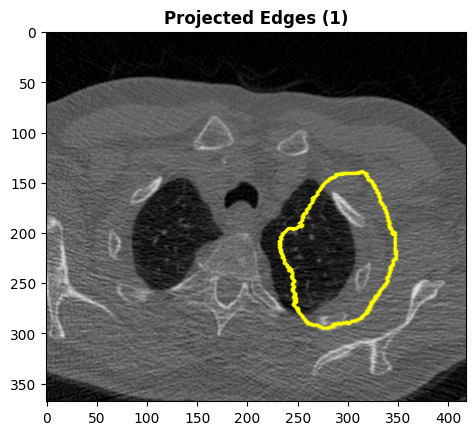

In [41]:
image_to_contour = clone_Img1.copy()

i = 0

for i in range (-1, 0):
    image = cv2.drawContours(image_to_contour, [largest_areas[i]],  -1, (255, 255, 0), 2, lineType=cv2.LINE_AA)
    i += 1                                                                # yellow                       # anti-aliased lines.
    
plt.imshow(image)
plt.title('Projected Edges (1)', fontweight ="bold")

Text(0.5, 1.0, 'Projected Edges (2)')

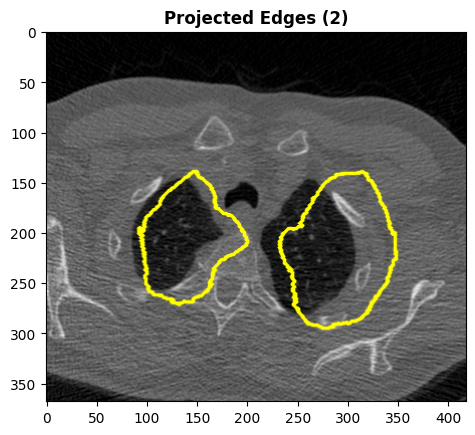

In [42]:
image_to_contour = clone_Img1.copy()

i = 0

for i in range (-2, 0):
    image = cv2.drawContours(image_to_contour, [largest_areas[i]],  -1, (255, 255, 0), 2, lineType=cv2.LINE_AA)
    i += 1                                                                # yellow                       # anti-aliased lines.
    
plt.imshow(image)
plt.title('Projected Edges (2)', fontweight ="bold")

Text(0.5, 1.0, 'Projected Edges (3)')

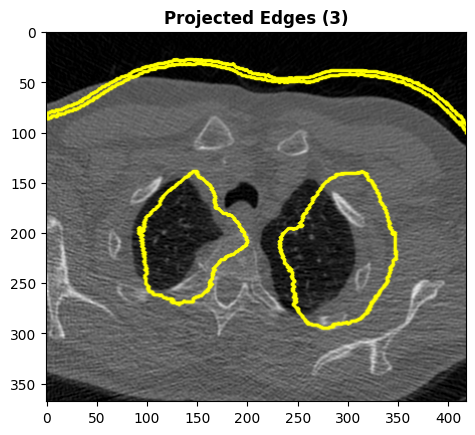

In [43]:
image_to_contour = clone_Img1.copy()

i = 0

for i in range (-3, 0):
    image = cv2.drawContours(image_to_contour, [largest_areas[i]],  -1, (255, 255, 0), 2, lineType=cv2.LINE_AA)
    i += 1                                                                # yellow                       # anti-aliased lines.
    
plt.imshow(image)
plt.title('Projected Edges (3)', fontweight ="bold")

Text(0.5, 1.0, 'Projected Edges (4)')

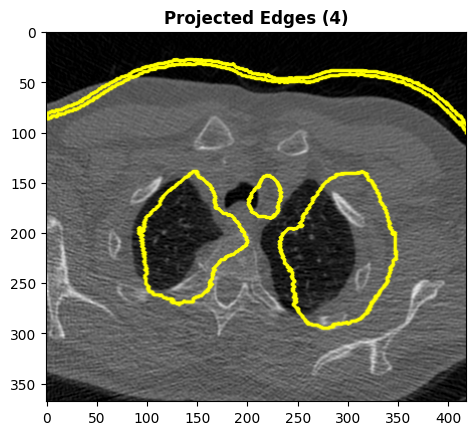

In [44]:
image_to_contour = clone_Img1.copy()

i = 0

for i in range (-4, 0):
    image = cv2.drawContours(image_to_contour, [largest_areas[i]],  -1, (255, 255, 0), 2, lineType=cv2.LINE_AA)
    i += 1                                                                # yellow                       # anti-aliased lines.
    
plt.imshow(image)
plt.title('Projected Edges (4)', fontweight ="bold")

Text(0.5, 1.0, 'Projected Edges (5)')

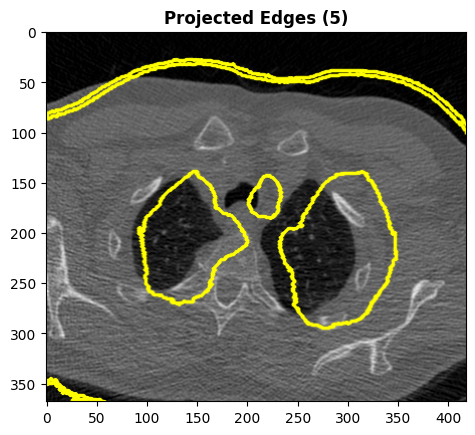

In [45]:
image_to_contour = clone_Img1.copy()

i = 0

for i in range (-5, 0):
    image = cv2.drawContours(image_to_contour, [largest_areas[i]],  -1, (255, 255, 0), 2, lineType=cv2.LINE_AA)
    i += 1                                                                # yellow                       # anti-aliased lines.
    
plt.imshow(image)
plt.title('Projected Edges (5)', fontweight ="bold")

Text(0.5, 1.0, 'Projected Edges (6)')

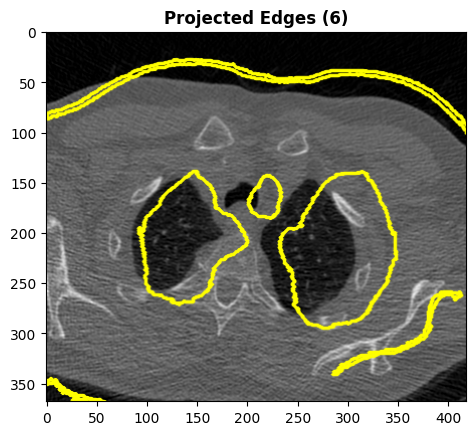

In [46]:
image_to_contour = clone_Img1.copy()

i = 0

for i in range (-6, 0):
    image = cv2.drawContours(image_to_contour, [largest_areas[i]],  -1, (255, 255, 0), 2, lineType=cv2.LINE_AA)
    i += 1                                                                # yellow                       # anti-aliased lines.
    
plt.imshow(image)
plt.title('Projected Edges (6)', fontweight ="bold")

Text(0.5, 1.0, 'Projected Edges (7)')

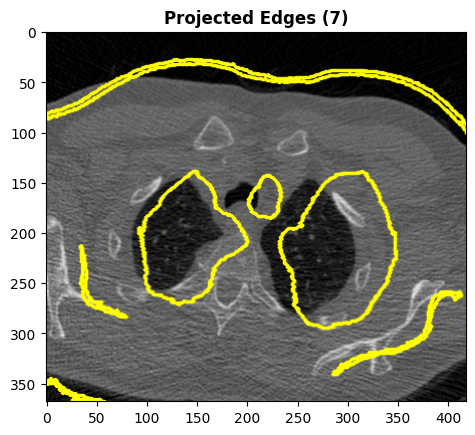

In [47]:
image_to_contour = clone_Img1.copy()

i = 0

for i in range (-7, 0):
    image = cv2.drawContours(image_to_contour, [largest_areas[i]],  -1, (255, 255, 0), 2, lineType=cv2.LINE_AA)
    i += 1                                                                # yellow                       # anti-aliased lines.
    
plt.imshow(image)
plt.title('Projected Edges (7)', fontweight ="bold")

Text(0.5, 1.0, 'Projected Edges (8)')

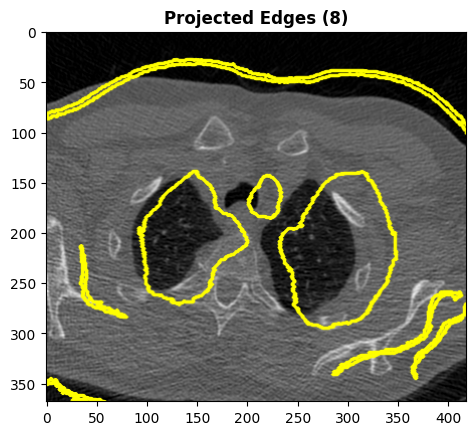

In [48]:
image_to_contour = clone_Img1.copy()

i = 0

for i in range (-8, 0):
    image = cv2.drawContours(image_to_contour, [largest_areas[i]],  -1, (255, 255, 0), 2, lineType=cv2.LINE_AA)
    i += 1                                                                # yellow                       # anti-aliased lines.
    
plt.imshow(image)
plt.title('Projected Edges (8)', fontweight ="bold")

Text(0.5, 1.0, 'Projected Edges (9)')

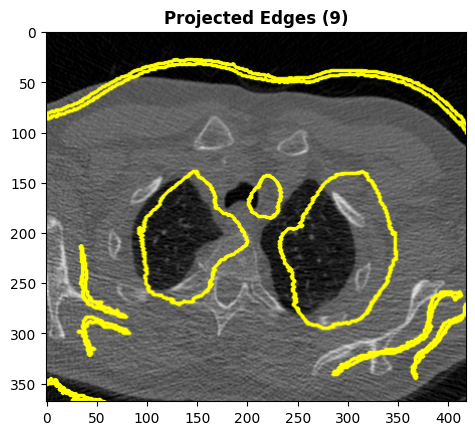

In [49]:
image_to_contour = clone_Img1.copy()

i = 0

for i in range (-9, 0):
    image = cv2.drawContours(image_to_contour, [largest_areas[i]],  -1, (255, 255, 0), 2, lineType=cv2.LINE_AA)
    i += 1                                                                # yellow                       # anti-aliased lines.
    
plt.imshow(image)
plt.title('Projected Edges (9)', fontweight ="bold")

Text(0.5, 1.0, 'Projected Edges (10)')

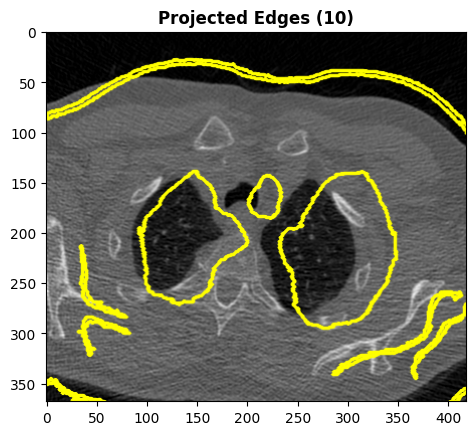

In [50]:
image_to_contour = clone_Img1.copy()

i = 0

for i in range (-10, 0):
    image = cv2.drawContours(image_to_contour, [largest_areas[i]],  -1, (255, 255, 0), 2, lineType=cv2.LINE_AA)
    i += 1                                                                # yellow                       # anti-aliased lines.
    
plt.imshow(image)
plt.title('Projected Edges (10)', fontweight ="bold")

Text(0.5, 1.0, 'Projected Edges (11)')

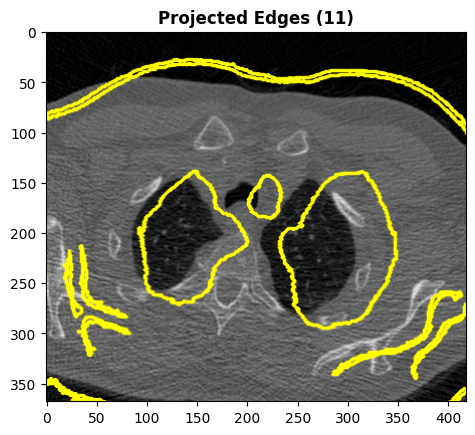

In [51]:
image_to_contour = clone_Img1.copy()

i = 0

for i in range (-11, 0):
    image = cv2.drawContours(image_to_contour, [largest_areas[i]],  -1, (255, 255, 0), 2, lineType=cv2.LINE_AA)
    i += 1                                                                # yellow                       # anti-aliased lines.
    
plt.imshow(image)
plt.title('Projected Edges (11)', fontweight ="bold")

Text(0.5, 1.0, 'Projected Edges (12)')

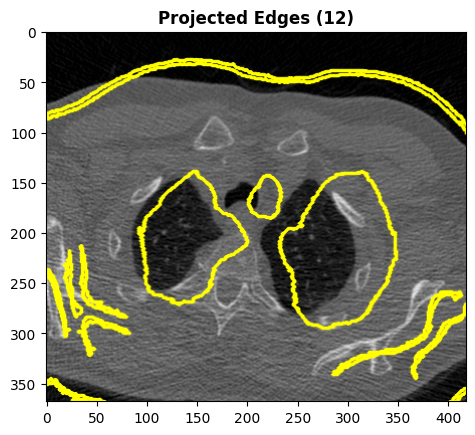

In [52]:
image_to_contour = clone_Img1.copy()

i = 0

for i in range (-12, 0):
    image = cv2.drawContours(image_to_contour, [largest_areas[i]],  -1, (255, 255, 0), 2, lineType=cv2.LINE_AA)
    i += 1                                                                # yellow                       # anti-aliased lines.
    
plt.imshow(image)
plt.title('Projected Edges (12)', fontweight ="bold")

Text(0.5, 1.0, 'Projected Edges (14)')

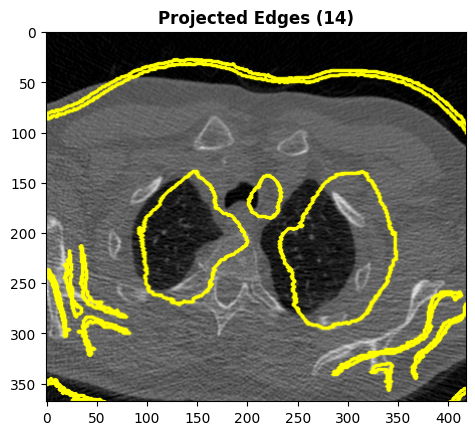

In [53]:
image_to_contour = clone_Img1.copy()

i = 0

for i in range (-14, 0):
    image = cv2.drawContours(image_to_contour, [largest_areas[i]],  -1, (255, 255, 0), 2, lineType=cv2.LINE_AA)
    i += 1                                                                # yellow                       # anti-aliased lines.
    
plt.imshow(image)
plt.title('Projected Edges (14)', fontweight ="bold")

Text(0.5, 1.0, 'Projected Edges (70)')

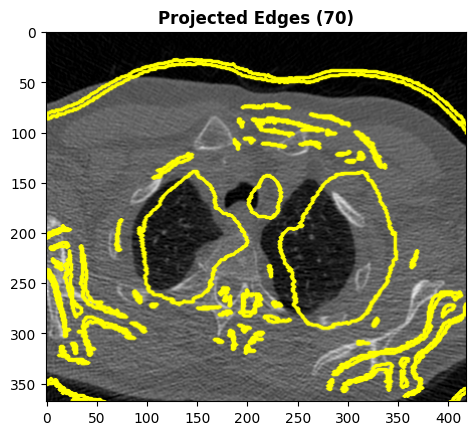

In [54]:
image_to_contour = clone_Img1.copy()

i = 0

for i in range (-70, 0):
    image = cv2.drawContours(image_to_contour, [largest_areas[i]],  -1, (255, 255, 0), 2, lineType=cv2.LINE_AA)
    i += 1                                                                # yellow                       # anti-aliased lines.
    
plt.imshow(image)
plt.title('Projected Edges (70)', fontweight ="bold")

In [55]:
print(len(largest_areas))

1066


Text(0.5, 1.0, 'Projected Edges (All)')

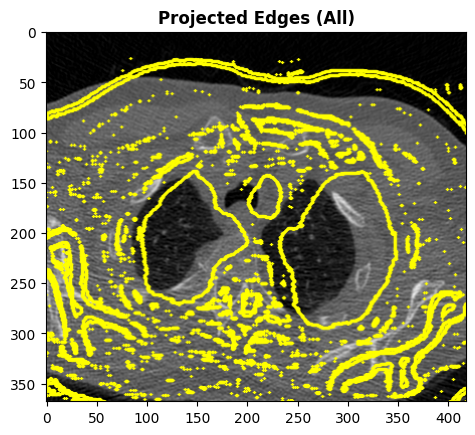

In [56]:
image_to_contour = clone_Img1.copy()

i = 0

for i in range (-len(largest_areas), 0):
    image = cv2.drawContours(image_to_contour, [largest_areas[i]],  -1, (255, 255, 0), 2, lineType=cv2.LINE_AA)
    i += 1                                                                # yellow                       # anti-aliased lines.
    
plt.imshow(image)
plt.title('Projected Edges (All)', fontweight ="bold")

# 4

In [57]:
#task 4

Εντολή για το άνοιγμα των επόμενων δύο γραφημάτων ως μεμονωμένα παράθυρα στο περιβάλλον εργασίας προκειμένου ο χρήστης να εισάγει τα σημεία χειροκίνητα στις δύο διαφορετικές εικόνες. 

In [58]:
%matplotlib tk

#### Επιλογή σημείων από το χρήστη

Ζητούνται **3** σημεία, καθώς είναι ο ελάχιστος απαραίτητος αριθμός για να εφαρμοστεί ο γραμμικός μετασχηματισμός στη συνέχεια.

Για να επιλεχθεί κάποιο σημείο πατήστε αριστερό κλικ.

Πατήστε δεξί κλικ για να αναιρέσετε την επιλογή ενός σημείου.

Για τις δύο εικόνες διατηρείστε ίδια σειρά επιλογής των αντίστοιχων σημείων.

In [59]:
getpointsCT1 = plt.figure("Click to get points on CT-1")
plt.title('Click on the image to get 3 points.', fontweight ="bold")
plt.imshow(img1_array[286], cmap=plt.cm.gray)

print("Points selected on CT-1:")
CT1_points = plt.ginput(3) 
print(CT1_points)

plt.show()
plt.close()

Points selected on CT-1:
[(170.66450216450215, 303.57792207792204), (167.67748917748918, 244.8333333333333), (197.54761904761904, 249.81168831168827)]


In [60]:
getpointsCT2= plt.figure("Click to get points on CT-2")
plt.title('Click on the image to get 3 points.', fontweight ="bold")
plt.imshow(img2_array[372], cmap=plt.cm.gray)

print("Points selected on CT-2:")
CT2_points = plt.ginput(3)  
print(CT2_points)  

plt.show()
plt.close()

Points selected on CT-2:
[(193.94696969696975, 318.4512987012987), (186.63636363636368, 259.9664502164502), (221.1006493506494, 268.32142857142856)]


# 5

In [ ]:
#task5 - calculate the affine transformation matrix

Εντολή για επιστροφή στην προκαθορισμένη ρύθμιση.

Τα γραφήματα θα αποτυπώνονται στο _jupyter notebook_ από εδώ και στο εξής ξανά.

In [61]:
%matplotlib inline

#### Υπολογισμός πίνακα μετασχηματισμού

In [62]:
# Convert the list of tuples to a 2D array

In [63]:
CT1_coords = np.array( [ [x, y] for x,y in  CT1_points ] )

print("\n  CT-1:  points' coordinates \n\n", CT1_coords)


  CT-1:  points' coordinates 

 [[170.66450216 303.57792208]
 [167.67748918 244.83333333]
 [197.54761905 249.81168831]]


In [64]:
CT2_coords = np.array( [ [x, y] for x,y in  CT2_points ] )

print("\n  CT-2:  points' coordinates \n\n", CT2_coords)


  CT-2:  points' coordinates 

 [[193.9469697  318.4512987 ]
 [186.63636364 259.96645022]
 [221.10064935 268.32142857]]


In [65]:
# Create matrix X(3x1)

X = np.array( [ [x[0]] for x in  CT2_coords ] )

print("\n\t  X  \n", X)


	  X  
 [[193.9469697 ]
 [186.63636364]
 [221.10064935]]


In [66]:
# Create matrix Y(3x1)

Y = np.array( [ [y[1]] for y in  CT2_coords ] )

print("\n\t  Y  \n", Y)


	  Y  
 [[318.4512987 ]
 [259.96645022]
 [268.32142857]]


In [67]:
# Create a column of ones(3x1) with the same shape as the array.

ones = np.ones((CT1_coords.shape[0], 1))

print(ones)

[[1.]
 [1.]
 [1.]]


In [68]:
# Stack the column of ones to the right of the array, inorder to create matrix M(3x3).

M = np.column_stack((CT1_coords, ones))

print("\t  M  \n", M)

	  M  
 [[170.66450216 303.57792208   1.        ]
 [167.67748918 244.83333333   1.        ]
 [197.54761905 249.81168831   1.        ]]


In [69]:
# Calculate the transpose of the matrix M(3x3).

M_t = np.transpose(M)  #or  M_t = M.T

print("\n\t  (M)'  \n", M_t)


	  (M)'  
 [[170.66450216 167.67748918 197.54761905]
 [303.57792208 244.83333333 249.81168831]
 [  1.           1.           1.        ]]


In [70]:
# Multiply matrix M with its transpose.

M_txM = np.dot(M_t, M)

print("\n\t  (M)' x M   \n", M_txM)


	  (M)' x M   
 [[9.62671745e+04 1.42212718e+05 5.35889610e+02]
 [1.42212718e+05 2.14508796e+05 7.98222944e+02]
 [5.35889610e+02 7.98222944e+02 3.00000000e+00]]


In [71]:
# Calculate the inverse of (M)'x M

inverseM_txM = np.linalg.inv(M_txM)

print("\n\t [(M)' x M] ^ -1   \n", inverseM_txM)


	 [(M)' x M] ^ -1   
 [[ 2.10321828e-03  3.70404838e-04 -4.74252821e-01]
 [ 3.70404838e-04  5.36448387e-04 -2.08900505e-01]
 [-4.74252821e-01 -2.08900505e-01  1.40632112e+02]]


In [72]:
A1 = np.dot( np.dot(inverseM_txM, M_t),  X )

print(A1)

[[  1.14274743]
 [  0.06634151]
 [-21.21926886]]


In [73]:
A2 = np.dot( np.dot(inverseM_txM, M_t),  Y ) 

print(A2)

[[ 0.11475288]
 [ 0.98974359]
 [-1.5972468 ]]


In [74]:
# Create the affine transformation matrix by stacking the matrices-vectors vertically.

AffineT = np.vstack((A1.T, A2.T))

print(AffineT)

[[  1.14274743   0.06634151 -21.21926886]
 [  0.11475288   0.98974359  -1.5972468 ]]


# 6

In [75]:
# Apply the affine transformation onto No. 372 intersection of CT-2.

Text(0.5, 1.0, 'Affine Transformation')

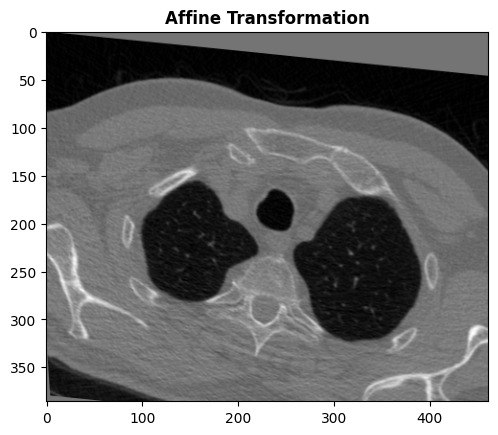

In [76]:
transformed_image = cv2.warpAffine(img2_array[372], AffineT, (img2_array[372].shape[1], img2_array[372].shape[0]))
transformed = plt.figure('Affine Trasnformation')
plt.imshow(transformed_image, cmap=plt.cm.gray)
plt.title('Affine Transformation', fontweight ="bold")

# 7

### Scale-Invariant Feature Transform

In [77]:
# create SIFT object.

sift = cv2.SIFT_create()

### Local Image Features

Για την εύρεση των σημείων ενδιαφέροντος:

* Constructing a Scale Space: To make sure that features are scale-independent.
        - use the Gaussian Blurring technique to reduce the noise in an image.
        - will be searching for these features on multiple scales
        - The ideal number of octaves should be four.
        - For each octave, the number of blur images should be five.
        - 
        - enhance the features using a technique called Difference of Gaussians or DoG.
        - Now that we have a new set of images, we are going to use this to find the important keypoints.
* Keypoint Localisation: Identifying the suitable features or keypoints.
        - The idea is to find the local maxima and minima for the images.
        - A second-order Hessian matrix is used to identify the keypoints that have low contrast, or exist very close to                   an edge.
        - Eliminate such keypoints.
        - To accomplish that, a second-order Taylor expansion is computed for each keypoint. 
        - If the resulting value is less than 0.03 (in magnitude), we reject the keypoint.
        - Having performed both the contrast test and the edge test to reject the unstable keypoints...
        - Assign an orientation value for each keypoint to make the rotation invariant.
* Orientation Assignment: Ensure the keypoints are rotation invariant.
    - Having the stable keypoints for the images:
        - Calculate the magnitude and orientation of each
                - For this, we will calculate the gradients in x and y directions 
                - Once we have the gradients, we can find the magnitude and orientation 
                - The magnitude represents the intensity of the pixel and the orientation gives the direction for the same.
$$ Magnitude = \sqrt{(G_x)^2 + (G_y)^2} $$
$$ Orientation = \phi = \tan^{-1} \left(\frac{G_y}{G_x}\right) $$
        - Create a histogram for magnitude and orientation
                - The bin at which we see the peak will be the orientation for the keypoint.
* Keypoint Descriptor: Assign a unique fingerprint to each keypoint.
        - Already we have stable keypoints that are scale-invariant and rotation invariant.
        - Next use the neighboring pixels, their orientations, and magnitude, to generate a unique fingerprint for this        keypoint called a ‘descriptor’.

In [78]:
# Using SIFT, image should be grayscale.

keypoints_1, descriptors_1 = sift.detectAndCompute(clone_Img1, None)
keypoints_2, descriptors_2 = sift.detectAndCompute(clone_Img2, None)

In [79]:
print(len(keypoints_1)) 

1150


In [80]:
print(keypoints_1)

(< cv2.KeyPoint 000002247D9FD3E0>, < cv2.KeyPoint 000002247DA83B10>, < cv2.KeyPoint 000002247BF2A3A0>, < cv2.KeyPoint 000002247BF90300>, < cv2.KeyPoint 000002247BF91770>, < cv2.KeyPoint 000002247C01F300>, < cv2.KeyPoint 000002247C01E880>, < cv2.KeyPoint 000002247C01E220>, < cv2.KeyPoint 000002247C01E8E0>, < cv2.KeyPoint 000002247C01F2A0>, < cv2.KeyPoint 000002247C01E460>, < cv2.KeyPoint 000002247C01F090>, < cv2.KeyPoint 000002247C01E1F0>, < cv2.KeyPoint 000002247C01F360>, < cv2.KeyPoint 000002247C01F510>, < cv2.KeyPoint 000002247C01EB80>, < cv2.KeyPoint 000002247C01F270>, < cv2.KeyPoint 000002247C01F4B0>, < cv2.KeyPoint 000002247C01F150>, < cv2.KeyPoint 000002247C01F000>, < cv2.KeyPoint 000002247C01E0D0>, < cv2.KeyPoint 000002247C01E910>, < cv2.KeyPoint 000002247C01E7F0>, < cv2.KeyPoint 000002247C01F0C0>, < cv2.KeyPoint 000002247C01ED60>, < cv2.KeyPoint 000002247C01EF40>, < cv2.KeyPoint 000002247C01EFD0>, < cv2.KeyPoint 000002247C01F1E0>, < cv2.KeyPoint 000002247C01F210>, < cv2.KeyPoin

In [81]:
print(descriptors_1.shape)

(1150, 128)


Output concatenated vectors of descriptors. 

Each descriptor is a 128-element vector, as returned by cv.SIFT.descriptorSize, so the total size of descriptors will be: 

**(Number of Keypoints) × 128**

A matrix of size N-by-128 of class single, one row per keypoint.

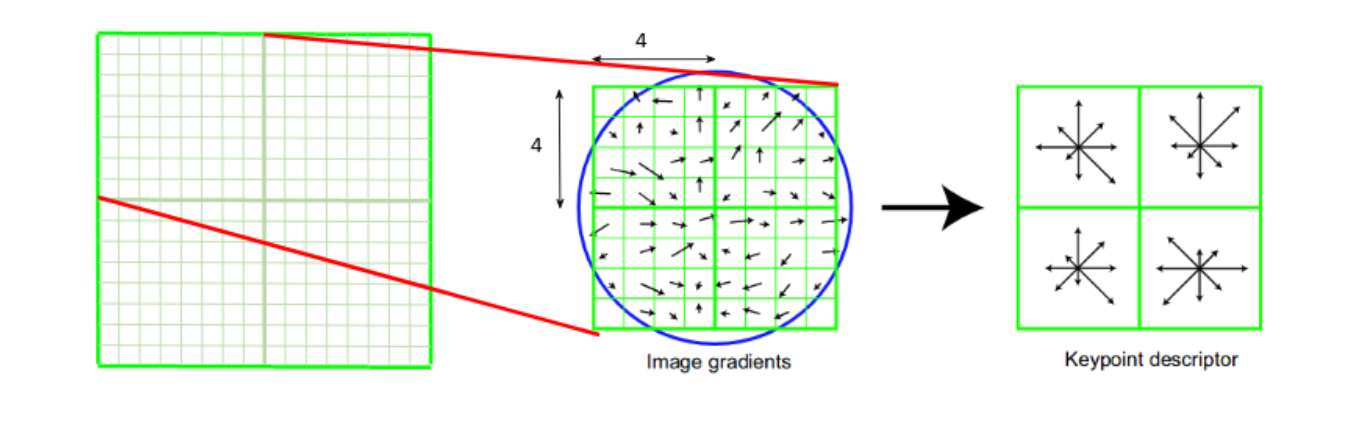

In [82]:
print(descriptors_1)

[[ 45.  45.  77. ...   2.   1.   0.]
 [ 85.  28.   3. ...   2.  13.  10.]
 [  0.   0.   0. ...  31.  93.  23.]
 ...
 [ 68.  34.   0. ...  22.   3.   1.]
 [185.  90.   1. ...   1.   0.   3.]
 [  6.   9.  20. ...   3.   1.  24.]]


In [83]:
print(len(keypoints_2))

651


In [84]:
print(descriptors_2)

[[  6.   3.   0. ...  57.  14.   0.]
 [  5.   0.   0. ...   1.   1.   6.]
 [  0.  10.   6. ...   7.   0.   2.]
 ...
 [ 58.  24.   1. ...   2.   0.   2.]
 [182.  70.   0. ...   0.   0.   3.]
 [  0.   0.   0. ...  11.   8.   1.]]


### Feature Matching

In [85]:
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

In [86]:
matches = bf.match(descriptors_1, descriptors_2)

matches = sorted(matches, key = lambda x:x.distance)

In [87]:
print(len(matches))

195


Text(0.5, 1.0, 'Feature matching with SIFT')

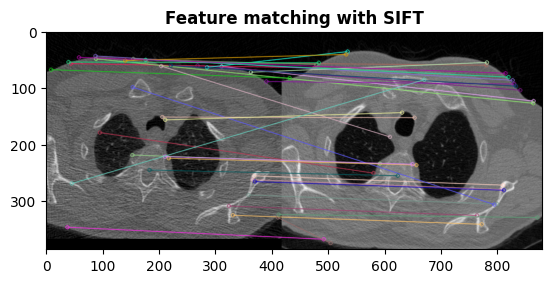

In [88]:
imgSIFT = cv2.drawMatches(clone_Img1, keypoints_1, clone_Img2, keypoints_2, matches[:35], clone_Img1, flags=10)

plt.imshow(imgSIFT)
plt.title('Feature matching with SIFT', fontweight ="bold")

Text(0.5, 1.0, 'Feature matching with SIFT')

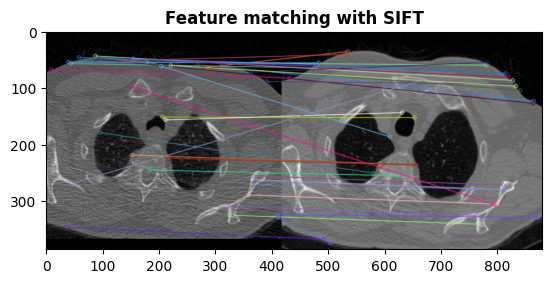

In [89]:
imgSIFT = cv2.drawMatches(clone_Img1, keypoints_1, clone_Img2, keypoints_2, matches[:35], clone_Img2, flags=10)

plt.imshow(imgSIFT)
plt.title('Feature matching with SIFT', fontweight ="bold")

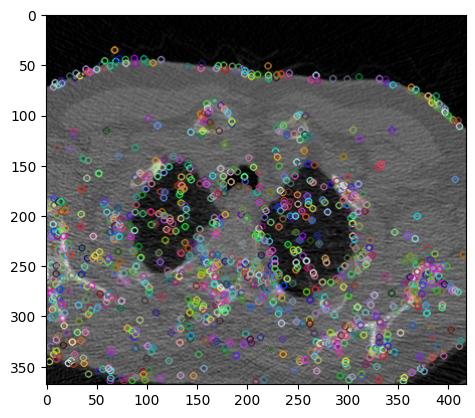

In [90]:
imG_a = cv2.drawKeypoints(clone_Img1, keypoints_1, clone_Img1, flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

plt.imshow(imG_a)

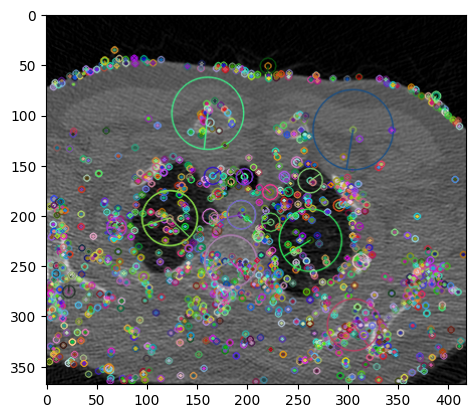

In [91]:
imG_b = cv2.drawKeypoints(clone_Img1, keypoints_1, clone_Img1, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(imG_b)

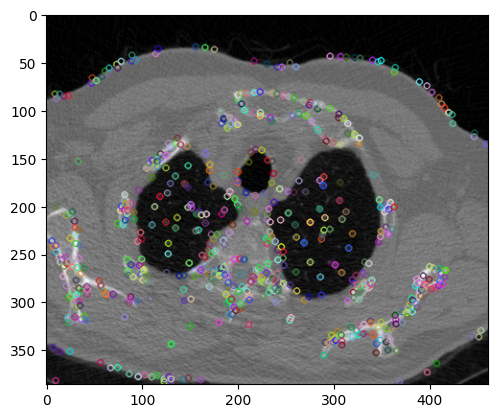

In [92]:
iMG_c = cv2.drawKeypoints(clone_Img2, keypoints_2, clone_Img2, flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

plt.imshow(iMG_c)

Transform into an 8-bit unsigned integer.

In [93]:
transformed_Ιmage = cv2.normalize(transformed_image, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

In [94]:
keypoints_3, descriptors_3 = sift.detectAndCompute(transformed_Ιmage, None)

In [95]:
print(len(keypoints_3)) 

520


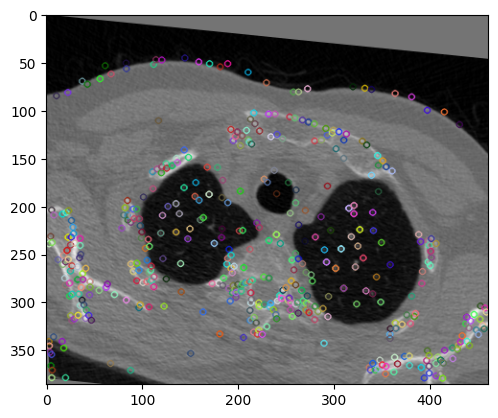

In [96]:
iMG_d = cv2.drawKeypoints(transformed_Ιmage, keypoints_3, transformed_Ιmage, flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

plt.imshow(iMG_d)

In [97]:
print(len(keypoints_2))

651


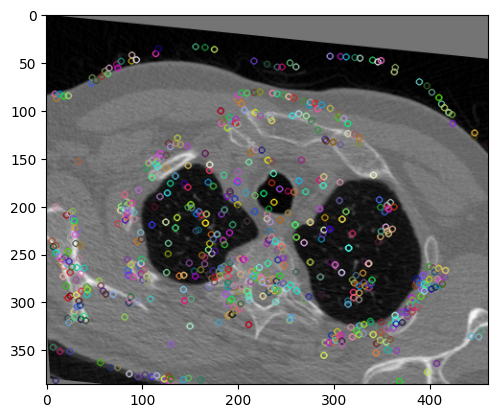

In [98]:
iMG_e = cv2.drawKeypoints(transformed_Ιmage, keypoints_2, transformed_Ιmage, flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

plt.imshow(iMG_e)

In [99]:
#Key_points = sift.detect(transformed_Ιmage, None)

In [100]:
#print(len(Key_points))

In [101]:
IMG = cv2.drawKeypoints(transformed_Ιmage, keypoints_3, transformed_Ιmage, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

Draws a circle with size of keypoint and includes its orientation.

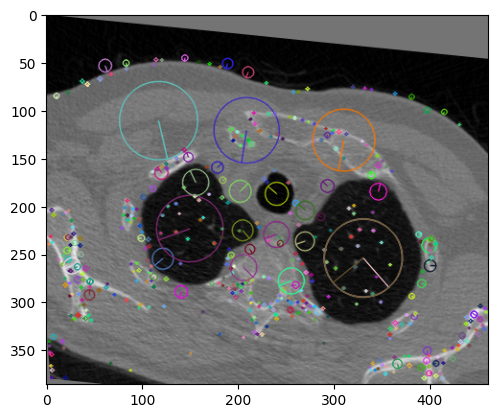

In [102]:
plt.imshow(IMG)

## Βιβλιογραφία

* K. Delimbasis, classroom & e-class notes, University of Thessaly, Lamia.
* Lowe, D.G. Distinctive Image Features from Scale-Invariant Keypoints. International Journal of Computer Vision 60, 91–110 (2004). https://doi.org/10.1023/B:VISI.0000029664.99615.94

* https://simpleitk.readthedocs.io/en/master/gettingStarted.html
* https://java2blog.com/cv2-threshold-python/
* https://docs.opencv.org/3.4/d7/d4d/tutorial_py_thresholding.html
* https://pyimagesearch.com/2021/04/28/opencv-thresholding-cv2-threshold/
* https://docs.opencv.org/3.4/d4/d73/tutorial_py_contours_begin.html
* https://www.geeksforgeeks.org/find-and-draw-contours-using-opencv-python/
* https://www.programcreek.com/python/example/70455/cv2.drawContours
* https://stackoverflow.com/questions/48259724/cv2-drawcontours-unfill-circles-inside-characters-python-opencv
* https://www.askpython.com/python/list/negative-indexing
* https://www.wikiwand.com/en/Scale-invariant_feature_transform
* https://docs.opencv.org/4.x/da/df5/tutorial_py_sift_intro.html
* https://docs.opencv.org/3.4/d0/d13/classcv_1_1Feature2D.html
* https://www.analyticsvidhya.com/blog/2019/10/detailed-guide-powerful-sift-technique-image-matching-python/?fbclid=IwAR24ak3Yx5pmGiTbeO8Rxqw_khWbAMoUmmzdHbmq0mGejEM6b51M6nFaCsU
* https://www.analyticsvidhya.com/blog/2019/09/feature-engineering-images-introduction-hog-feature-descriptor/
* https://www.geeksforgeeks.org/sift-interest-point-detector-using-python-opencv/
* https://stackoverflow.com/questions/69010332/why-key-points-is-none-with-some-images-while-using-sift-detectandcomputeimage
* http://amroamroamro.github.io/mexopencv/matlab/cv.SIFT.detectAndCompute.html
* https://github.com/methylDragon/opencv-python-reference/blob/master/02%20OpenCV%20Feature%20Detection%20and%20Description.md
* https://github.com/opencv/opencv_contrib
* https://docs.opencv.org/3.4/d4/d5d/group__features2d__draw.html
* https://www.geeksforgeeks.org/python-opencv-drawkeypoints-fuction/
* https://www.programcreek.com/python/example/89309/cv2.drawKeypoints
* https://docs.opencv.org/3.4/d4/d5d/group__features2d__draw.html